## Seaborn Visualization:

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Histogram">Histogram</a></li>
<li><a href="#Barchart">Bar Chart</a></li>
<li><a href="#Boxplot">Boxplot</a></li>
<li><a href="#kde">Kernel Density Plot</a></li>
<li><a href="#distplot">DistPlot (Histogram + KDE) </a></li>
<li><a href="#stripplot">Strip Plot</a></li>
<li><a href="#violin">Violin Plot</a></li>
<li><a href="#heat">HeatMap</a></li>
<li><a href="#Cluster">Cluster Map</a></li>
<li><a href="#pairplot">Pair Plot</a></li>
<li><a href="#pairgrip">Pair Grid</a></li>
<li><a href="#facet">Facet Grid</a></li>
<li><a href="#join">Join Plot</a></li>
<li><a href="#regplot">RegPlot</a></li>
</ul>

#### <a id='intro'></a>
### Introduction

Visualizations can give a better insight of data that we might missing while looking only on data. But it might confusing to select a visualization for a data scenario or to know what are the different types of visualization. 

Below are some of the basic tips for the starting with visulization :
- 1-D continuous data : Histogram
- 1-D discrete data : Bar chart
- 2-D continuous : Heatmap(gives correlation), Paired Scatter plot, Join scatter plot etc
- 2-D discrete data : stacked bar, separate bar for each category
- 2-D mixed attributes : subplot,  boxplot, violin plot, kernel density plot
- 3-D and above : use hue, colour, size and shape to represent each attribute. bubble chart is good for 3-D.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#read form CSV
data = pd.read_csv("student-data.csv")
display(data.head(n=5))



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### <a id='Histogram'></a>
## Histogram

(array([ 82., 104.,  98.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <a list of 10 Patch objects>)

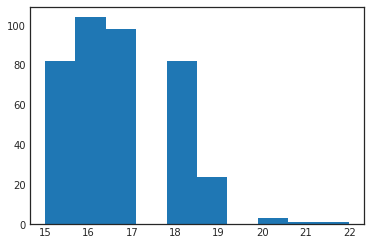

In [8]:
sns.set_style("white")

plt.hist(data["age"])

#plt.hist(data["age"],bins=8,histtype = 'bar') #{‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}

### <a id='Barchart'></a>
## Bar Chart

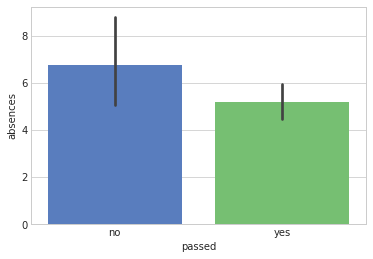

In [13]:
sns.set_style(style='whitegrid')
sns.barplot(x='passed',y='absences',data=data,palette = 'muted')

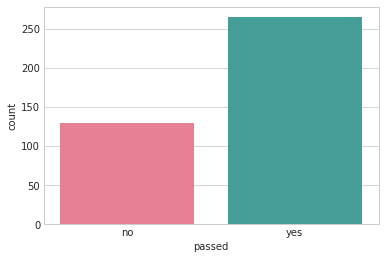

In [28]:
sns.set_style(style='whitegrid')
sns.countplot(x='passed',data=data,palette = 'husl')

### <a id='Boxplot'></a>
## Boxplot

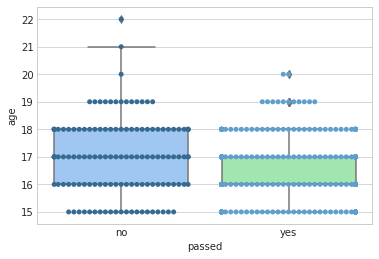

In [29]:
sns.boxplot(x= data["passed"],y=data["age"],orient = "v",palette = "pastel")
sns.swarmplot(x= data["passed"],y=data["age"] ,orient = "v",palette = "Blues_d")

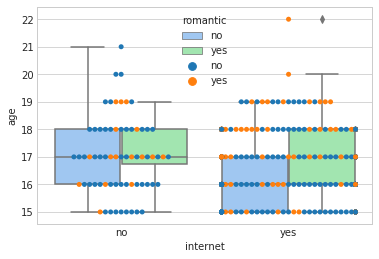

In [24]:
sns.boxplot(x= data["internet"],y=data["age"],hue = data["romantic"] ,orient = "v",palette = "pastel")
sns.swarmplot(x= data["internet"],y=data["age"],hue = data["romantic"] ,orient = "v")

### <a id='kde'></a>
## Kernel Density Plot

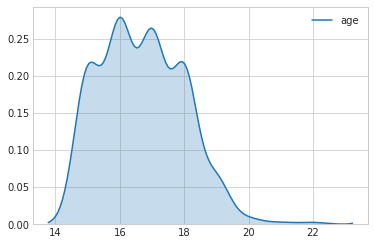

In [37]:
sns.kdeplot(data["age"],shade =True)

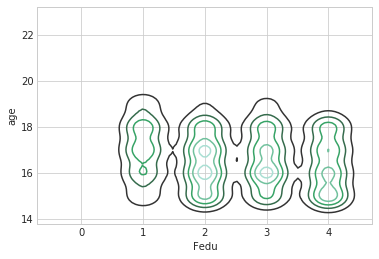

In [56]:
sns.kdeplot(data["Fedu"],data["age"], n_levels=5)

### <a id='distplot'></a>
## DistPlot (Histogram + KDE)

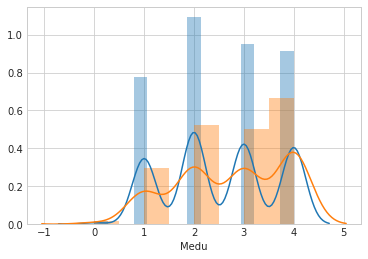

In [52]:
sns.distplot(data["Fedu"])
sns.distplot(data["Medu"])

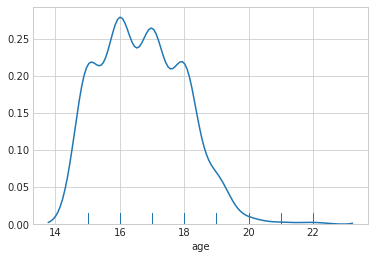

In [54]:
sns.distplot(data["age"],rug=True, hist=False)

### <a id='stripplot'></a>
## Strip Plot

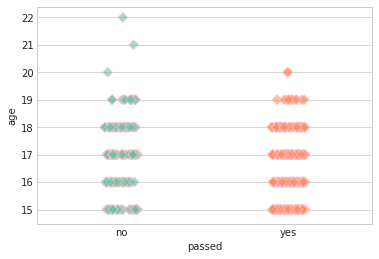

In [90]:
sns.stripplot(x="passed",y="age",data=data,jitter =1, palette="Set2",\
              size=7, marker="D", linewidth = 1,edgecolor="pink", alpha=0.6)

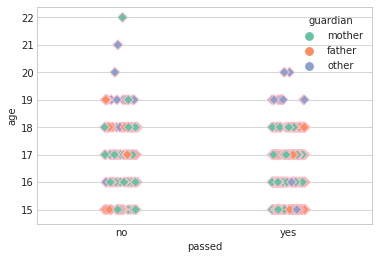

In [98]:
sns.stripplot(x="passed",y="age",data=data,jitter =0.1
              , palette="Set2", hue = "guardian", \
              size=7, marker="D", linewidth = 1,edgecolor="pink", alpha=1)

### <a id='violin'></a>
## Violin Plot

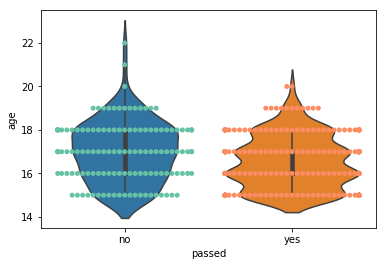

In [10]:
sns.violinplot(x='passed',y='age', data = data)
sns.swarmplot(x= data["passed"],y=data["age"] ,orient = "v",palette="Set2")

### <a id='heat'></a>
## HeatMap

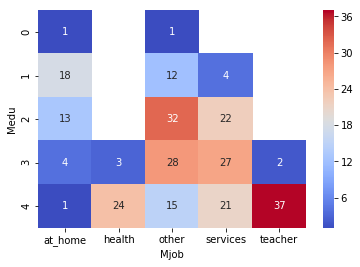

In [61]:
data1 = data[["Medu", "Mjob", "passed"]][data['passed'] == 'yes']
data1 = data1.pivot_table(index='Medu', columns='Mjob', values='passed',aggfunc='count')
ax = sns.heatmap(data1,cmap='coolwarm',annot =True)

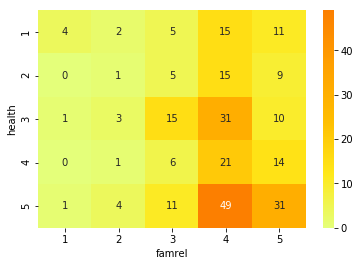

In [76]:
data1 = data[["health", "famrel", "passed"]][data['passed'] == 'yes']
data1 = data1.pivot_table(index='health', columns='famrel', values='passed',aggfunc='count').fillna(0)
ax = sns.heatmap(data1,cmap="Wistia",annot =True)

### <a id='Cluster'></a>
## Cluster Map

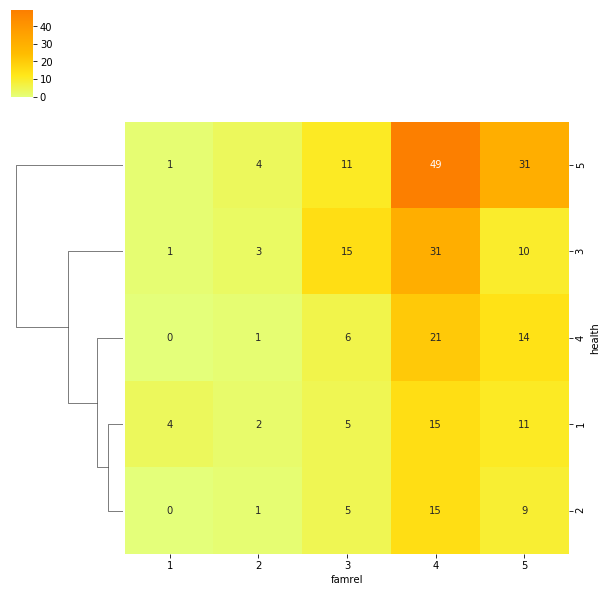

In [83]:
data1 = data[["health", "famrel", "passed"]][data['passed'] == 'yes']
data1 = data1.pivot_table(index='health', columns='famrel', values='passed',aggfunc='count').fillna(0)
ax = sns.clustermap(data1,cmap="Wistia",annot =True,method="weighted",col_cluster = False)

### <a id='pairplot'></a>
## Pair Plot

### <a id='pairgrip'></a>
## Pair Grid

### <a id='facet'></a>
## Facet Grid

### <a id='join'></a>
## Join Plot

### <a id='regplot'></a>
## RegPlot